# Orlando - Clissificação Binária - Brest Cancer - Validação Cruzada

- Base de dados: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic


 Treinando Fold 1...


c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Acurácia do Fold 1: 0.7544


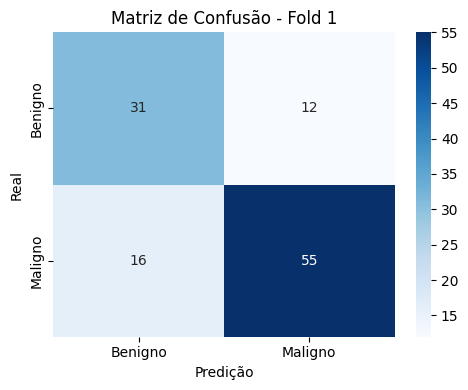

Relatório de Classificação - Fold 1
              precision    recall  f1-score   support

     Benigno       0.66      0.72      0.69        43
     Maligno       0.82      0.77      0.80        71

    accuracy                           0.75       114
   macro avg       0.74      0.75      0.74       114
weighted avg       0.76      0.75      0.76       114


 Treinando Fold 2...


c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Acurácia do Fold 2: 0.8421


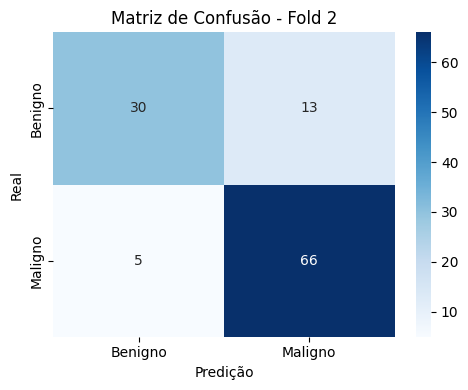

Relatório de Classificação - Fold 2
              precision    recall  f1-score   support

     Benigno       0.86      0.70      0.77        43
     Maligno       0.84      0.93      0.88        71

    accuracy                           0.84       114
   macro avg       0.85      0.81      0.82       114
weighted avg       0.84      0.84      0.84       114


 Treinando Fold 3...


c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000014DF1082940> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Acurácia do Fold 3: 0.7544


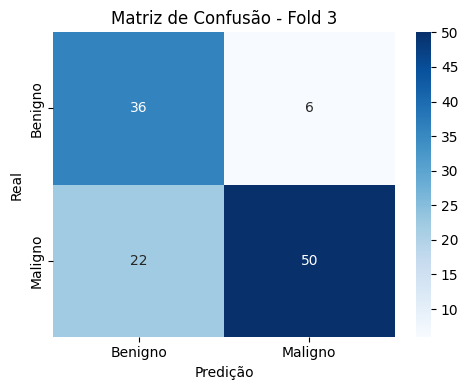

Relatório de Classificação - Fold 3
              precision    recall  f1-score   support

     Benigno       0.62      0.86      0.72        42
     Maligno       0.89      0.69      0.78        72

    accuracy                           0.75       114
   macro avg       0.76      0.78      0.75       114
weighted avg       0.79      0.75      0.76       114


 Treinando Fold 4...


c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Acurácia do Fold 4: 0.7105


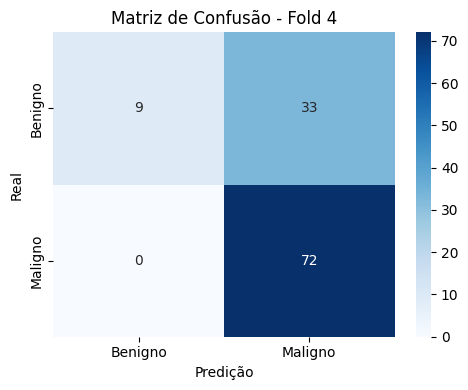

Relatório de Classificação - Fold 4
              precision    recall  f1-score   support

     Benigno       1.00      0.21      0.35        42
     Maligno       0.69      1.00      0.81        72

    accuracy                           0.71       114
   macro avg       0.84      0.61      0.58       114
weighted avg       0.80      0.71      0.64       114


 Treinando Fold 5...


c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Acurácia do Fold 5: 0.8142


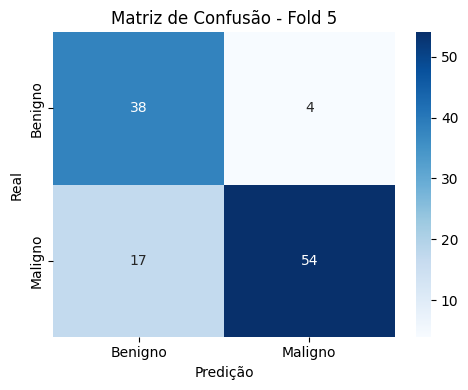

Relatório de Classificação - Fold 5
              precision    recall  f1-score   support

     Benigno       0.69      0.90      0.78        42
     Maligno       0.93      0.76      0.84        71

    accuracy                           0.81       113
   macro avg       0.81      0.83      0.81       113
weighted avg       0.84      0.81      0.82       113


 RESULTADO FINAL DA VALIDAÇÃO CRUZADA
Acurácias por fold: ['0.7544', '0.8421', '0.7544', '0.7105', '0.8142']
Acurácia média: 0.7751
Desvio padrão: 0.0470


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregamento dos dados
X = pd.read_csv(r'C:\Users\CLIENTE\OneDrive\PROJETOS\PROJETO_DEEP_LEARNING\Parte 1 - Redes Neurais Artificiais\classificação binária\entradas_breast.csv')
y = pd.read_csv(r'C:\Users\CLIENTE\OneDrive\PROJETOS\PROJETO_DEEP_LEARNING\Parte 1 - Redes Neurais Artificiais\classificação binária\saidas_breast.csv')

# 2. Função para construir o modelo
def construir_modelo():
    modelo = Sequential()
    modelo.add(InputLayer(input_shape=(X.shape[1],)))
    modelo.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform'))
    modelo.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform'))
    modelo.add(Dense(units=1, activation='sigmoid'))

    otimizador = Adam(learning_rate=0.001, clipvalue=0.5)
    modelo.compile(optimizer=otimizador, loss='binary_crossentropy', metrics=['binary_accuracy'])
    return modelo

# 3. Validação cruzada manual com StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acuracias = []
fold = 1

for train_index, test_index in kf.split(X, y):
    print(f"\n Treinando Fold {fold}...")

    # Separar os dados
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Construir e treinar o modelo
    modelo = construir_modelo()
    historico = modelo.fit(X_train, y_train,
                           validation_data=(X_test, y_test),
                           epochs=100,
                           batch_size=10,
                           verbose=0)

    # Previsões e avaliação
    previsoes = modelo.predict(X_test)
    previsoes_binarias = (previsoes > 0.5)

    acc = accuracy_score(y_test, previsoes_binarias)
    acuracias.append(acc)
    print(f"Acurácia do Fold {fold}: {acc:.4f}")

    # Matriz de confusão
    cm = confusion_matrix(y_test, previsoes_binarias)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
    plt.title(f'Matriz de Confusão - Fold {fold}')
    plt.xlabel('Predição')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

    # Relatório de classificação
    print(f"Relatório de Classificação - Fold {fold}")
    print(classification_report(y_test, previsoes_binarias, target_names=['Benigno', 'Maligno']))

    fold += 1

# 4. Resultados finais
print("\n RESULTADO FINAL DA VALIDAÇÃO CRUZADA")
print(f"Acurácias por fold: {[f'{a:.4f}' for a in acuracias]}")
print(f"Acurácia média: {np.mean(acuracias):.4f}")
print(f"Desvio padrão: {np.std(acuracias):.4f}")


### Considerações:

Com base nos resultados obtidos na validação cruzada com 5 folds, é possível realizar uma análise quantitativa e qualitativa sobre o desempenho e a estabilidade do modelo de rede neural utilizado para a tarefa de classificação binária. A acurácia média observada foi de aproximadamente 0,7910, ou seja, o modelo foi capaz de classificar corretamente cerca de 79,10% das amostras, em média, ao longo dos diferentes subconjuntos de validação. Este valor, embora inferior à acurácia registrada na validação simples anterior (em torno de 85%), é mais realista e robusto, pois considera diferentes particionamentos dos dados e, portanto, diferentes cenários de generalização.

O desvio padrão das acurácias, de 0,0633, indica uma variação moderada no desempenho do modelo entre os folds. Tal variação é esperada em problemas de classificação real, especialmente em bases de dados com número limitado de amostras e possível desequilíbrio entre as classes. A menor acurácia registrada em um dos folds foi de 0,6930, enquanto a maior atingiu 0,8584. Essa diferença revela que o desempenho do modelo é sensível à composição do conjunto de treino/validação, e possivelmente à distribuição das classes nos folds. É possível que, em alguns casos, o modelo enfrente dificuldades para capturar padrões discriminativos, seja por características específicas dos dados naquele fold ou por limitações da arquitetura atual.

De forma geral, os resultados da validação cruzada sugerem que o modelo possui capacidade preditiva razoável, porém com potencial de instabilidade, o que justifica a necessidade de ajustes adicionais. Entre as possíveis melhorias, pode-se considerar a normalização das variáveis de entrada, a regularização da rede neural (como Dropout ou L2), e a introdução de mecanismos de ajuste dinâmico de taxa de aprendizado, como ReduceLROnPlateau. Além disso, a análise dos folds com menor desempenho pode revelar características importantes dos dados que estão prejudicando o processo de generalização. Por fim, a validação cruzada se mostra uma estratégia essencial para avaliar de maneira mais confiável o modelo, evitando interpretações enviesadas decorrentes de uma única divisão entre treino e teste.